# Logical Alarms for Misaligned Classifiers

The power of logic alone as an aid for AI safety is demonstrated by the algorithms in the `ntqr.alams` module. This notebook provides some examples demonstrating their use.

In [3]:
import ntqr.alarms, ntqr.plots
import ntqr.r2.raxioms, ntqr.r2.evaluations
import ntqr.r3.raxioms, ntqr.r3.evaluations
import matplotlib.pyplot as plt
import sympy, random, itertools
sympy.init_session()

IPython console for SymPy 1.13.2 (Python 3.11.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



## Binary classification, the R=2 case

In [5]:
# The basic unit of the alarms are comparisons between pairs of classifiers 
# in an ensemble. For each classifier we create its individual axioms
labels = ['a', 'b']
c1axioms = ntqr.r2.raxioms.SingleClassifierAxioms(labels, 'i')
c2axioms = ntqr.r2.raxioms.SingleClassifierAxioms(labels, 'j')
# Let's make an alarm for a small test, Q=10 questions.
alarm = ntqr.alarms.SingleClassifierAxiomsAlarm(10,
                                               (c1axioms, c2axioms), 
                                               ntqr.r2.evaluations.SingleClassifierEvaluations)
# We want the classifiers to be better than 1/2 for both labels
alarm.set_safety_specification([2,2])

In [6]:
# Let's first look at a test where these two pairs are misaligned. The misalignment trace
# gives us the number of question types and whether one or more of the classifiers fail
# the safety specification (> 50%) at the assumed number of question types.
%pprint
list(alarm.misalignment_trace([(2,8),(8,2)]))

Pretty printing has been turned OFF


[((10, 0), True), ((5, 5), True), ((0, 10), True), ((6, 4), True), ((4, 6), True), ((2, 8), True), ((3, 7), True), ((1, 9), True), ((9, 1), True), ((8, 2), True), ((7, 3), True)]

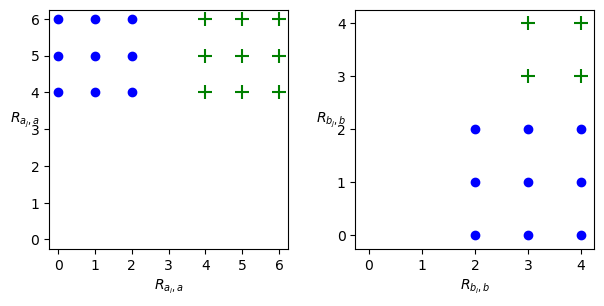

In [7]:
# We can check visually for the misalignment
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (6,4), [(2,8),(8,2)], plt=plt)

At the assumed number of questions {math}`(Q_a = 6, Q_b = 4),` there are no evaluations for either of these classifiers that have both of them hitting the green cross points - the points that satisfy the safety specification.

In [9]:
# Let's now try pair responses that cannot conclusively prove the pair is misaligned.
alarm.misalignment_trace([(2,8),(3,7)])

{((1, 9), False), ((10, 0), True), ((5, 5), True), ((6, 4), True), ((4, 6), True), ((0, 10), False), ((9, 1), True), ((8, 2), True), ((7, 3), True), ((3, 7), False), ((2, 8), False)}

These classifier responses have question settings (e.g. (2,8)) where the pair has evaluations that are logically consistent with how they responded **and** satisfy the safety specification. And there are also question number settings that do not satisfy the safety specification.

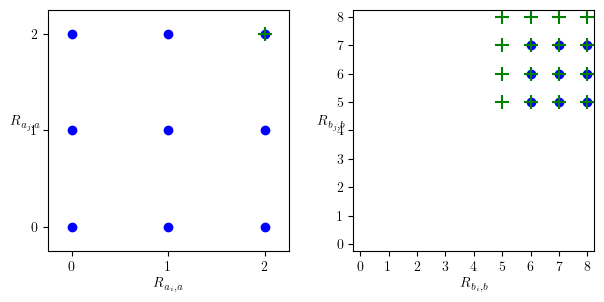

In [11]:
# The question numbers that has group evaluations that satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (2,8),[(2,8),(3,7)], plt=plt)

At $Q_a = 2$ and $Q_b = 8$ there are group evaluations for both labels that satisfy the safety specification.

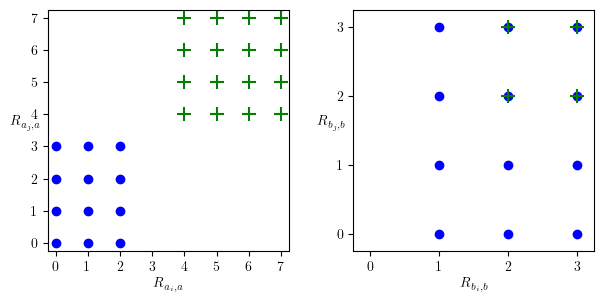

In [13]:
# The question numbers that has group evaluations that DO NOT satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (7,3),[(2,8),(3,7)], plt=plt)

Here we can see that the 'a' label has to group evaluation with question numbers $(Q_a = 7, Q_b = 3)$ where both classifiers are better than 50% for **both** labels.

## Three class classification, the R=3 case

In [16]:
# The basic unit of the alarms are comparisons between pairs of classifiers in an ensemble
# For each classifier we create its individual axioms
# We now have three labels for two classifiers
labels = ['a', 'b', 'c']
c1axioms = ntqr.r3.raxioms.SingleClassifierAxioms(labels, 'i')
c2axioms = ntqr.r3.raxioms.SingleClassifierAxioms(labels, 'j')
# Let's make an alarm for a small test, Q=10 questions.
alarm = ntqr.alarms.SingleClassifierAxiomsAlarm(10,
                                               (c1axioms, c2axioms), 
                                               ntqr.r3.evaluations.SingleClassifierEvaluations)
# We want the classifiers to be better than 1/2 for both labels
alarm.set_safety_specification([2,2,2])

In [17]:
# We look at responses that make the pair misaligned at some
# question number settings for this Q=10 test.
trace = alarm.misalignment_trace([(5,3,2),(2,3,5)])
# Collect the qs under their test val
{key:[qs for val,qs in group] 
 for key,group in itertools.groupby(
     sorted([(test_val, qs) for qs, test_val in trace]),lambda x: x[0])}

{False: [(2, 5, 3), (3, 4, 3), (3, 5, 2)], True: [(0, 0, 10), (0, 1, 9), (0, 2, 8), (0, 3, 7), (0, 4, 6), (0, 5, 5), (0, 6, 4), (0, 7, 3), (0, 8, 2), (0, 9, 1), (0, 10, 0), (1, 0, 9), (1, 1, 8), (1, 2, 7), (1, 3, 6), (1, 4, 5), (1, 5, 4), (1, 6, 3), (1, 7, 2), (1, 8, 1), (1, 9, 0), (2, 0, 8), (2, 1, 7), (2, 2, 6), (2, 3, 5), (2, 4, 4), (2, 6, 2), (2, 7, 1), (2, 8, 0), (3, 0, 7), (3, 1, 6), (3, 2, 5), (3, 3, 4), (3, 6, 1), (3, 7, 0), (4, 0, 6), (4, 1, 5), (4, 2, 4), (4, 3, 3), (4, 4, 2), (4, 5, 1), (4, 6, 0), (5, 0, 5), (5, 1, 4), (5, 2, 3), (5, 3, 2), (5, 4, 1), (5, 5, 0), (6, 0, 4), (6, 1, 3), (6, 2, 2), (6, 3, 1), (6, 4, 0), (7, 0, 3), (7, 1, 2), (7, 2, 1), (7, 3, 0), (8, 0, 2), (8, 1, 1), (8, 2, 0), (9, 0, 1), (9, 1, 0), (10, 0, 0)]}

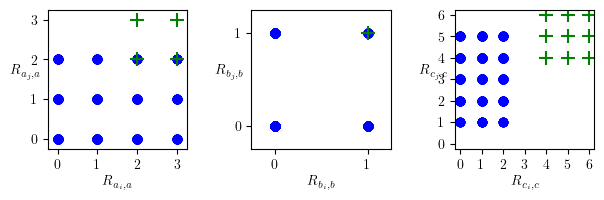

In [18]:
# The question numbers that has group evaluations that does not satisfy the safety specification
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (3,1,6),[(5,3,2),(2,3,5)], plt=plt)

In [19]:
# Now a pair that is not logically misaligned (i.e. there exist questions numbers that satisfy the safety specification)
trace = alarm.misalignment_trace([(5,3,2),(4,3,3)])
# Collect the qs under their test val
{key:[qs for val,qs in group] 
 for key,group in itertools.groupby(
     sorted([(test_val, qs) for qs, test_val in trace]),lambda x: x[0])}

{False: [(2, 5, 3), (3, 4, 3), (3, 5, 2), (4, 3, 3), (4, 4, 2), (4, 5, 1), (5, 2, 3), (5, 3, 2), (5, 4, 1), (5, 5, 0), (6, 1, 3), (6, 2, 2), (6, 3, 1), (6, 4, 0), (7, 0, 3), (7, 1, 2), (7, 2, 1), (7, 3, 0)], True: [(0, 0, 10), (0, 1, 9), (0, 2, 8), (0, 3, 7), (0, 4, 6), (0, 5, 5), (0, 6, 4), (0, 7, 3), (0, 8, 2), (0, 9, 1), (0, 10, 0), (1, 0, 9), (1, 1, 8), (1, 2, 7), (1, 3, 6), (1, 4, 5), (1, 5, 4), (1, 6, 3), (1, 7, 2), (1, 8, 1), (1, 9, 0), (2, 0, 8), (2, 1, 7), (2, 2, 6), (2, 3, 5), (2, 4, 4), (2, 6, 2), (2, 7, 1), (2, 8, 0), (3, 0, 7), (3, 1, 6), (3, 2, 5), (3, 3, 4), (3, 6, 1), (3, 7, 0), (4, 0, 6), (4, 1, 5), (4, 2, 4), (4, 6, 0), (5, 0, 5), (5, 1, 4), (6, 0, 4), (8, 0, 2), (8, 1, 1), (8, 2, 0), (9, 0, 1), (9, 1, 0), (10, 0, 0)]}

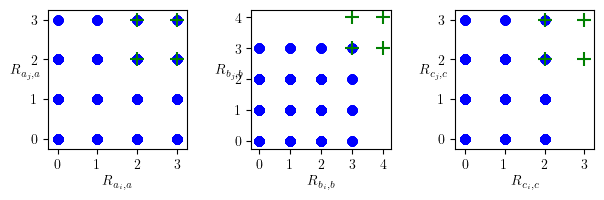

In [20]:
# The question numbers that has group evaluations that satisfy the safety specification, (3,4,3)
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (3,4,3),[(5,3,2),(4,3,3)], plt=plt)
# All the label pair evaluations touch at least one of the green cross values

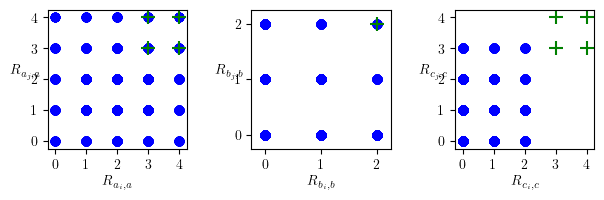

In [21]:
# The question numbers that has group evaluations that does not satisfy 
# the safety specification, (4,2,4)
# Here the 1st classifiers 'i' is not greater than 50% for the c-label
ntqr.plots.plot_pair_logical_alarm_at_qs(labels, ['i','j'], (4,2,4),[(5,3,2),(4,3,3)], plt=plt)
# The 'c' label performance for classifier 'i' is violating the safety specification at qs = (4,2,4)